In [1]:
# importing required libraries and packages 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
data = pd.read_csv('German_Credit.csv')

In [3]:
data

,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,3115687,A14,36,A32,A46,9055,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,9671059,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,1,A191,A201,1
1007,2180183,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,1,A192,A201,1
1008,3130615,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,1,A191,A201,1
1009,6267789,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
data.columns = ['customer_id',
                  'checking_account_status', 'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit']

In [5]:
data

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,3115687,A14,36,A32,A46,9055,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,9671059,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,1,A191,A201,1
1007,2180183,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,1,A192,A201,1
1008,3130615,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,1,A191,A201,1
1009,6267789,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [6]:
print(data.shape)

data = data.drop('customer_id', axis=1)
data.shape

(1011, 22)


(1011, 21)

In [7]:
encoded_categories = [['checking_account_status', 
              {'A11' : '< 0 DM', 
               'A12' : '0 - 200 DM', 
               'A13' : '> 200 DM or salary assignment', 
               'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]

In [ ]:
for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    credit[col] = [dic[x] for x in credit[col]]
    
credit.head()    

In [8]:
type(encoded_categories)

list

In [9]:
len(encoded_categories)

14

In [10]:
encoded_categories[0]   

['checking_account_status',
 {'A11': '< 0 DM',
  'A12': '0 - 200 DM',
  'A13': '> 200 DM or salary assignment',
  'A14': 'none'}]

Output of each element in the list is also a list; a list of the column title and a dictionary of the encoded pairs and corresponding descriptive human texts

In [11]:
for encoding in encoded_categories:
    '''
    This for list loops through the whole list (for each of the column names),
    saves the column name in variable column, and the encodings in a dic variable
    '''
    column = encoding[0]
    dic = encoding[1]
    data[column] = [dic[x] for x in data[column]]

In [12]:
data.head()

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,1
1,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
2,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
3,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,none,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1
4,none,36,current loans paid,education,9055,unknown/none,1 - 4 years,2,male-single,none,...,unknown-none,35,none,for free,1,unskilled-resident,2,yes,yes,0


### Checking the class imbalance

In [21]:
label_counts = data['bad_credit'].value_counts()

In [22]:
label_counts

0    709
1    302
Name: bad_credit, dtype: int64

In [23]:
type(label_counts)

pandas.core.series.Series

In [28]:
label_counts.values

array([709, 302], dtype=int64)

Text(0.5, 0, 'Labels (0, 1)')

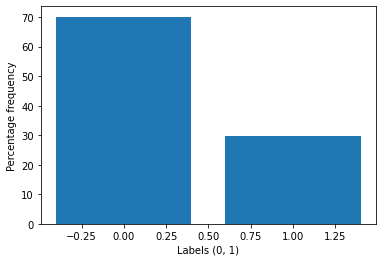

In [34]:
plt.bar(label_counts.index, label_counts.values/data.shape[0] * 100)
plt.ylabel('Percentage frequency')
plt.xlabel('Labels (0, 1)')

In [37]:
def plot_box(data, cols, label='bad_credit'):
    for col in cols:
        #sns.set_style("whitegrid")
        fig = plt.figure(figsize=(12, 8))
        sns.boxplot(col, label, data=data)
        plt.xlabel(col) 
        plt.ylabel(label)
        plt.show()
        
columns = ['loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
            'age_yrs', 'number_loans', 'dependents']

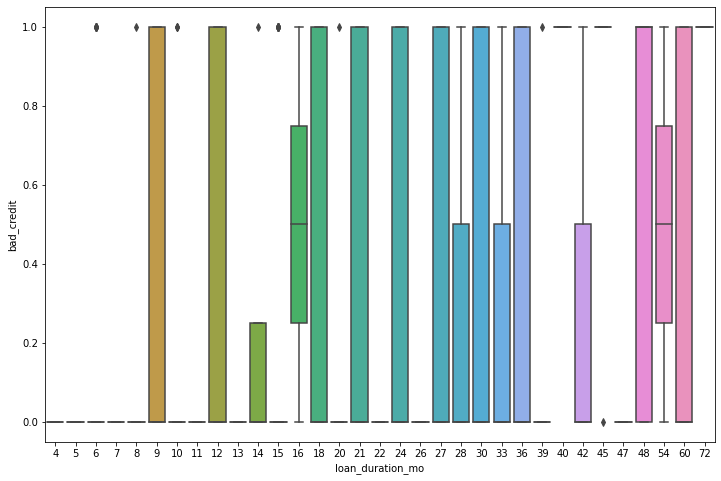

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


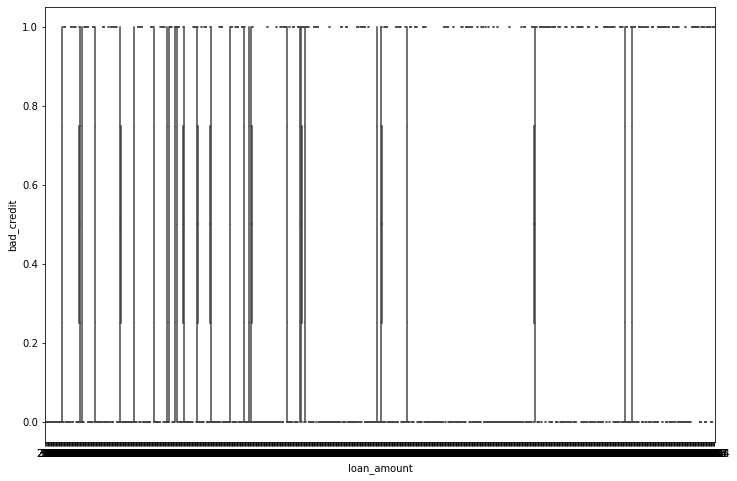

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


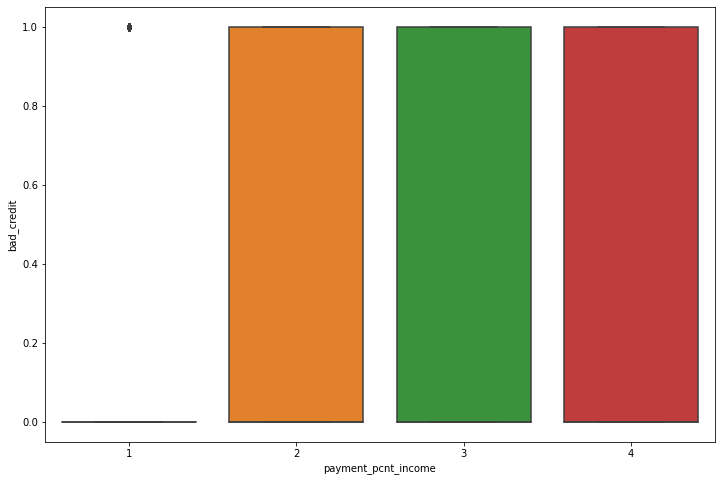

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


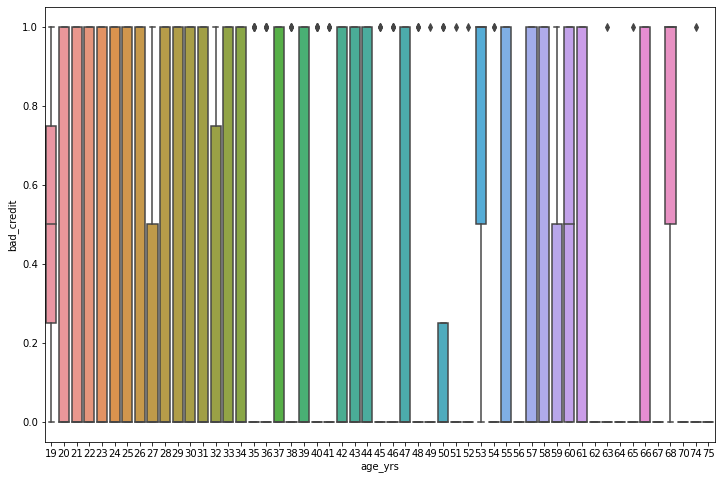

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


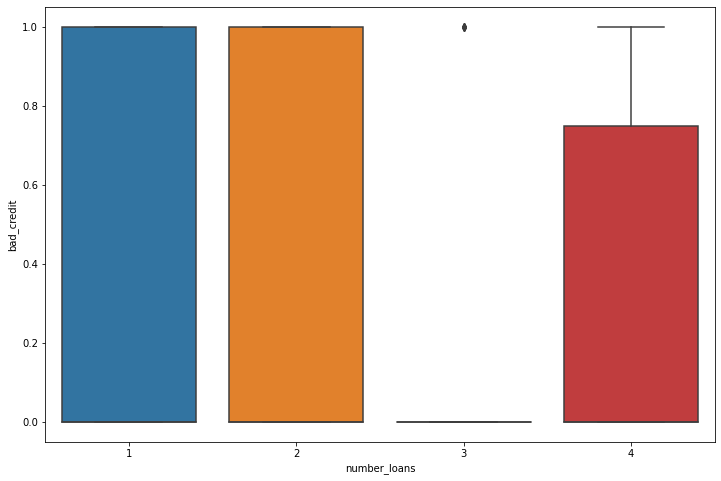

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


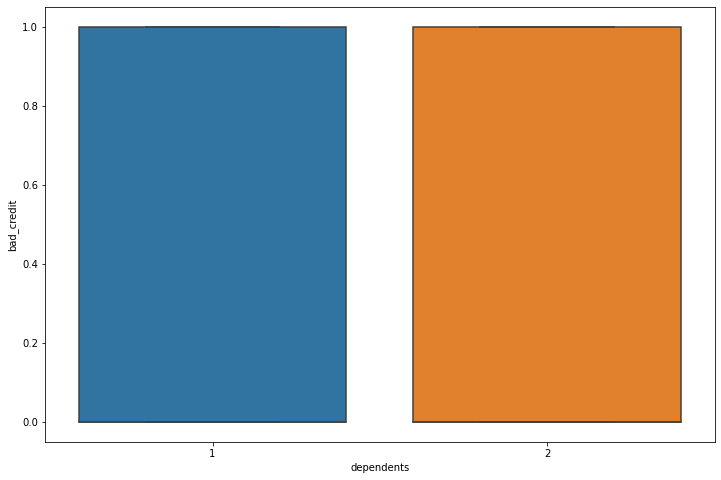

In [38]:
plot_box(data, columns)

In [39]:
def plot_box(data, cols, label='bad_credit'):
    for col in cols:
        #sns.set_style("whitegrid")
        fig = plt.figure(figsize=(12, 8))
        sns.boxplot(label, col, data=data)
        plt.xlabel(col) 
        plt.ylabel(label)
        plt.show()
        
columns = ['loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
            'age_yrs', 'number_loans', 'dependents']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


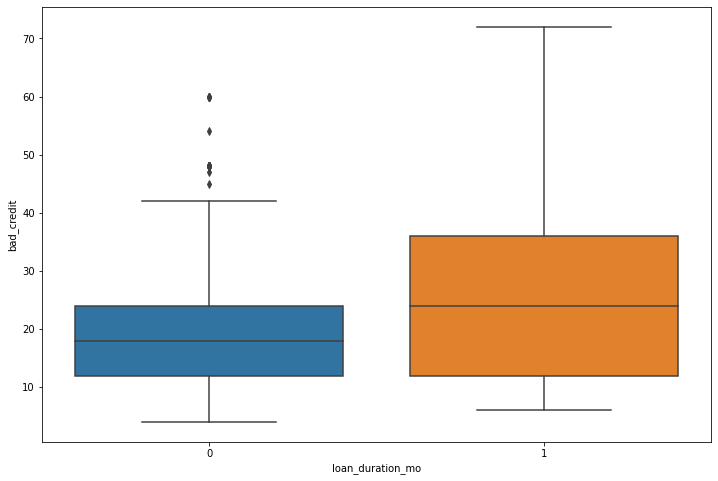

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


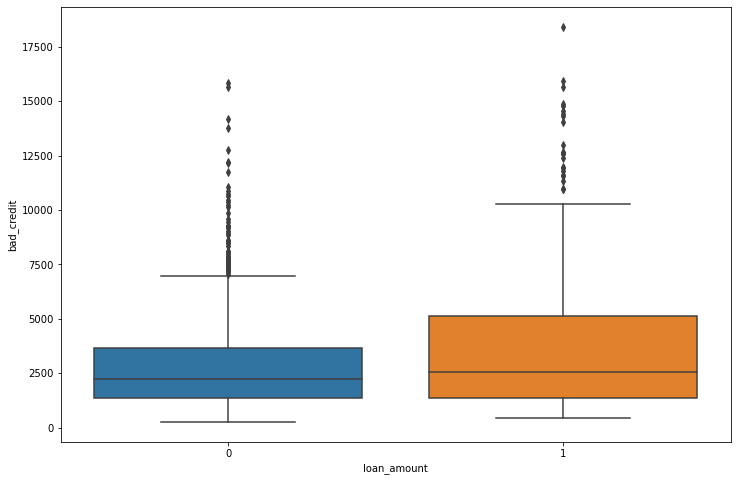

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


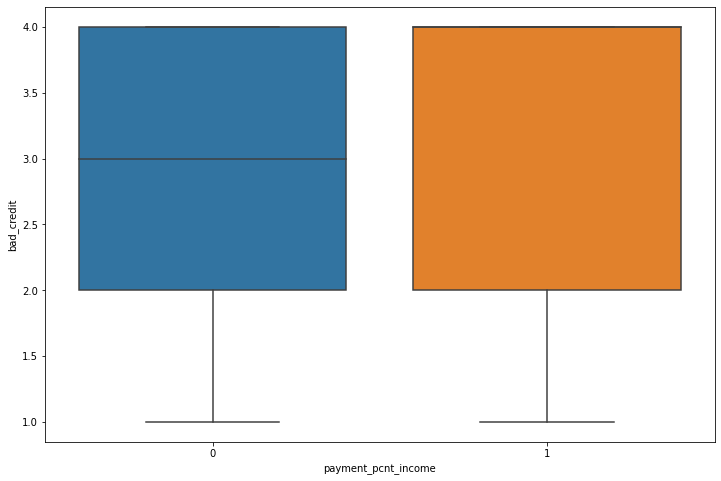

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


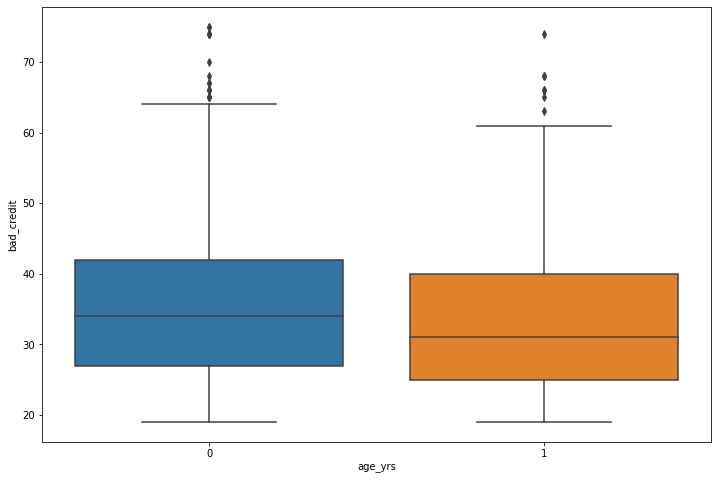

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


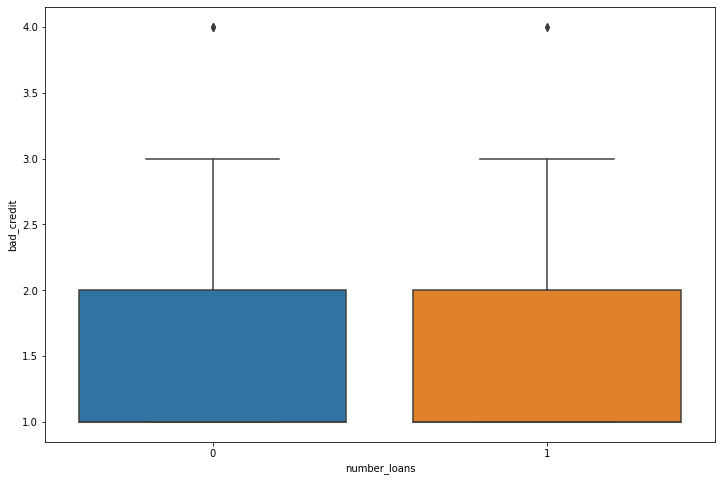

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


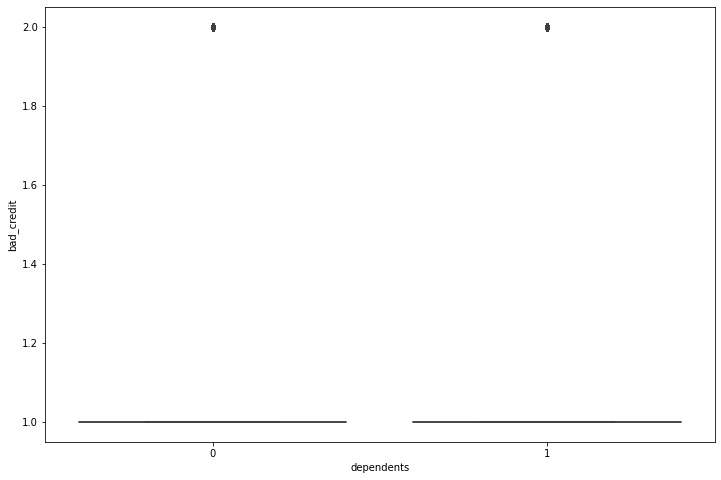

In [40]:
plot_box(data, columns)

In [41]:
def plot_violins(data, cols, label='bad_credit'):
    for col in cols:
        #sns.set_style("whitegrid")
        fig = plt.figure(figsize=(12, 8))
        sns.violinplot(label, col, data=data)
        plt.xlabel(col) 
        plt.ylabel(label)
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


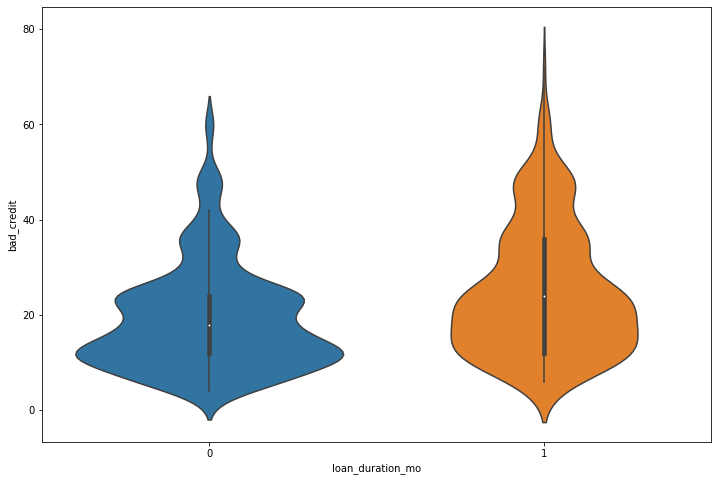

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


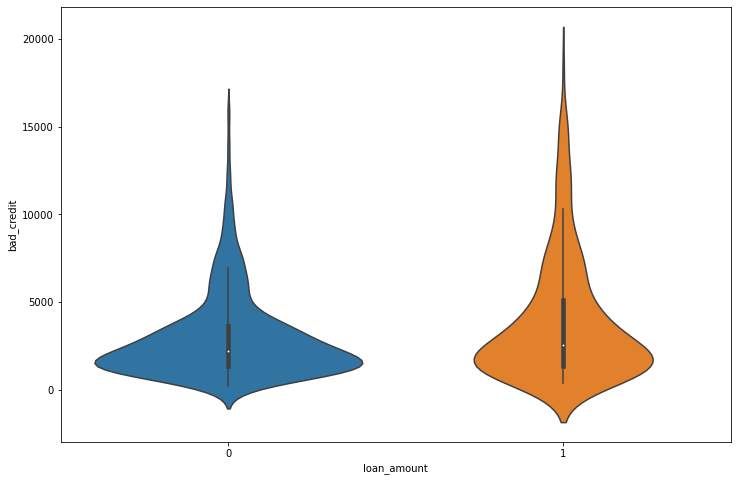

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


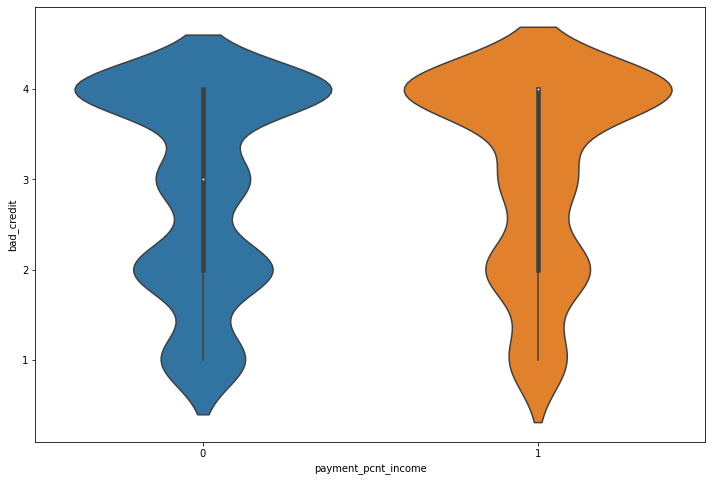

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


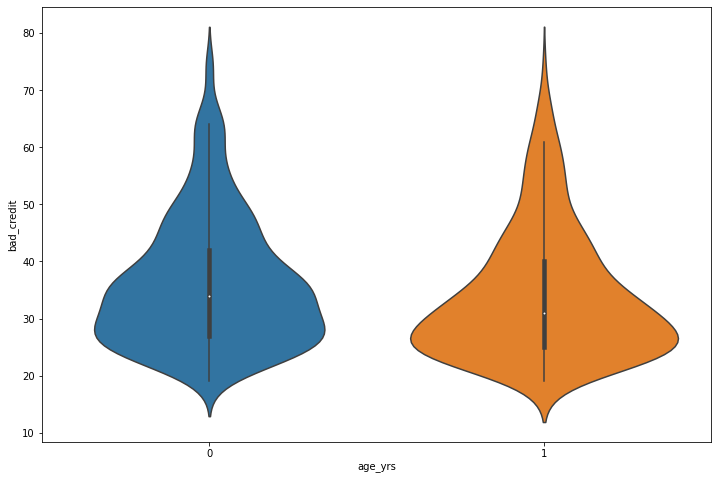

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


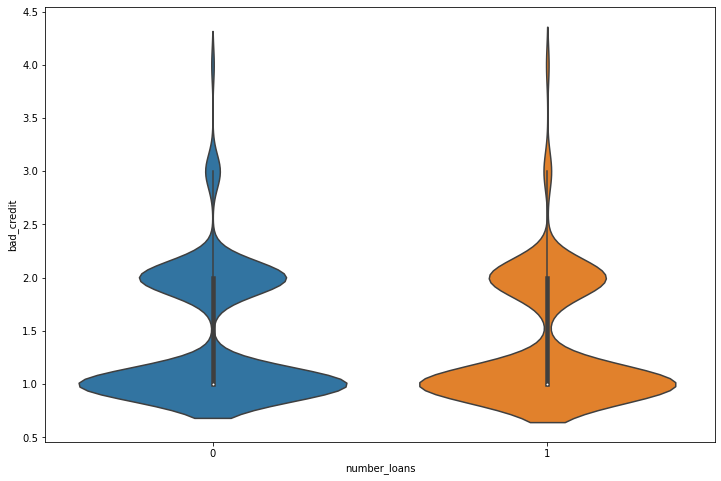

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


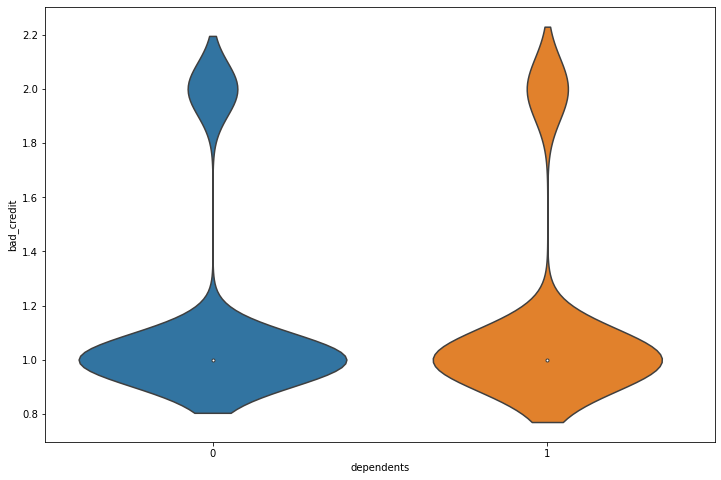

In [42]:
plot_violins(data, columns)

In [34]:
cat_cols = ['checking_account_status', 'credit_history', 'purpose', 'savings_account_balance', 
                  'time_employed_yrs', 'gender_status', 'other_signators', 'property', 
                  'other_credit_outstanding', 'home_ownership', 'job_category', 'telephone', 
                  'foreign_worker']

In [15]:
np.ones(shape = data.shape[0])

array([1., 1., 1., ..., 1., 1., 1.])

In [17]:
dummies = np.ones(shape = data.shape[0])
dummies.shape

(1011,)

In [18]:
data['dummy'] = dummies

In [20]:
data[['dummy', 'bad_credit', 'checking_account_status']].groupby(['bad_credit', 'checking_account_status'], as_index = False).count()

,bad_credit,checking_account_status,dummy
0,0,0 - 200 DM,167
1,0,< 0 DM,139
2,0,> 200 DM or salary assignment,50
3,0,none,353
4,1,0 - 200 DM,106
5,1,< 0 DM,136
6,1,> 200 DM or salary assignment,14
7,1,none,46


In [21]:
counts = data[['dummy', 'bad_credit', 'checking_account_status']].groupby(['bad_credit', 'checking_account_status'], as_index = False).count()

In [22]:
counts[counts['bad_credit'] == 0][['checking_account_status', 'dummy']]

,checking_account_status,dummy
0,0 - 200 DM,167
1,< 0 DM,139
2,> 200 DM or salary assignment,50
3,none,353


In [ ]:
import numpy as np
cat_cols = ['checking_account_status', 'credit_history', 'purpose', 'savings_account_balance', 
                  'time_employed_yrs', 'gender_status', 'other_signators', 'property', 
                  'other_credit_outstanding', 'home_ownership', 'job_category', 'telephone', 
                  'foreign_worker']

credit['dummy'] = np.ones(shape = credit.shape[0])
for col in cat_cols:
    print(col)
    counts = credit[['dummy', 'bad_credit', col]].groupby(['bad_credit', col], as_index = False).count()
    temp = counts[counts['bad_credit'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['bad_credit'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bad credit')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['bad_credit'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Good credit')
    plt.ylabel('count')
    plt.show()

For column checking_account_status:


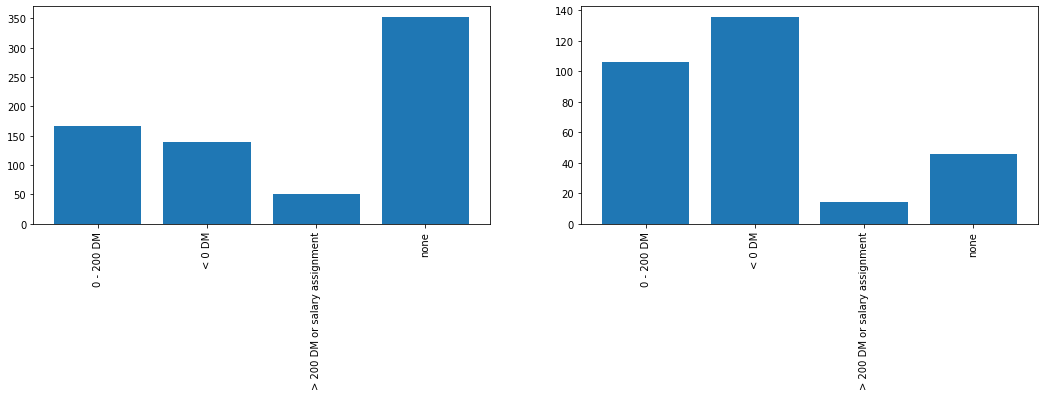

For column credit_history:


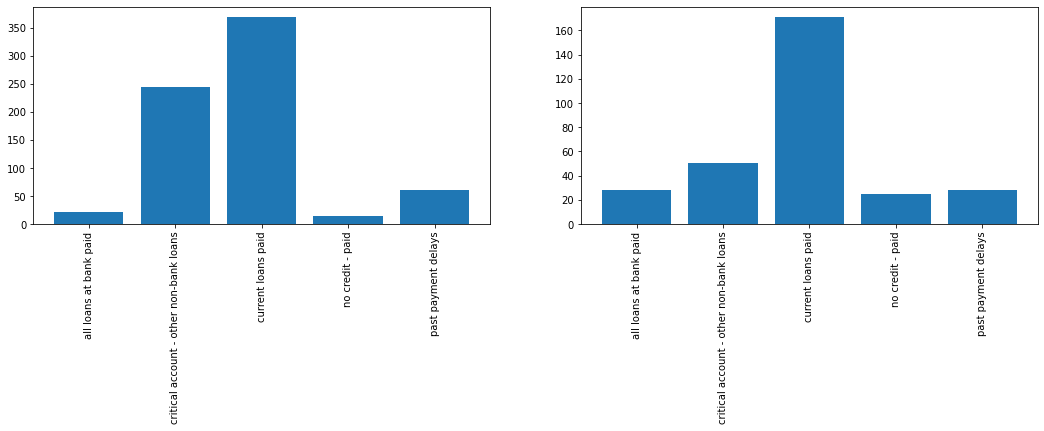

For column purpose:


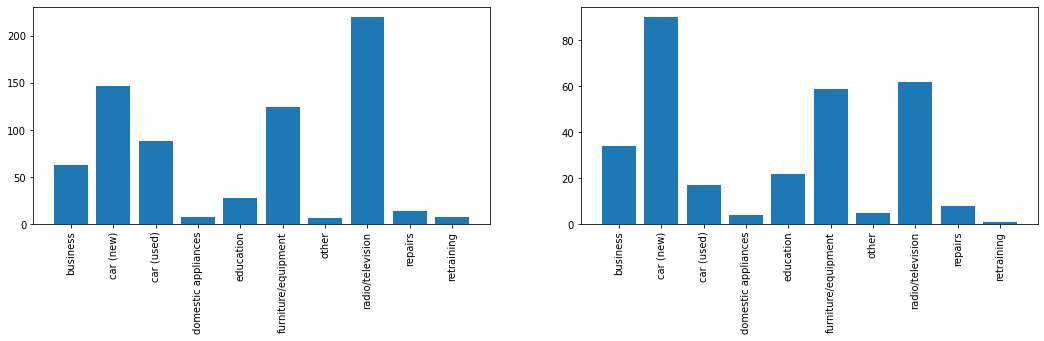

For column savings_account_balance:


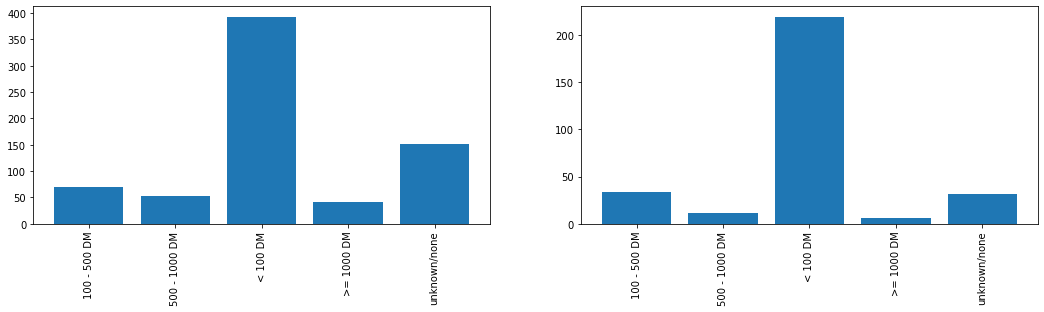

For column time_employed_yrs:


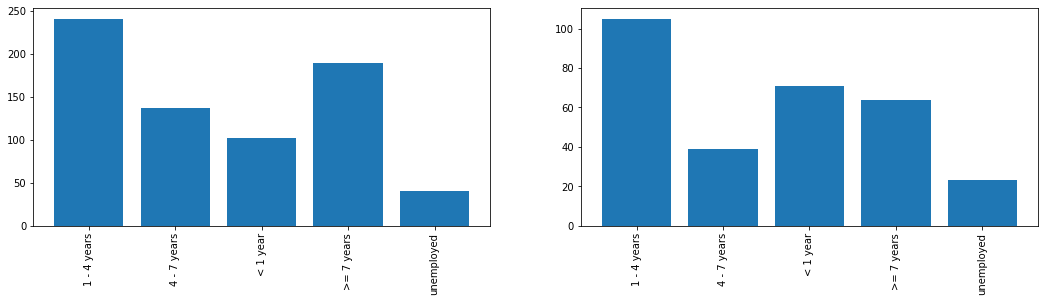

For column gender_status:


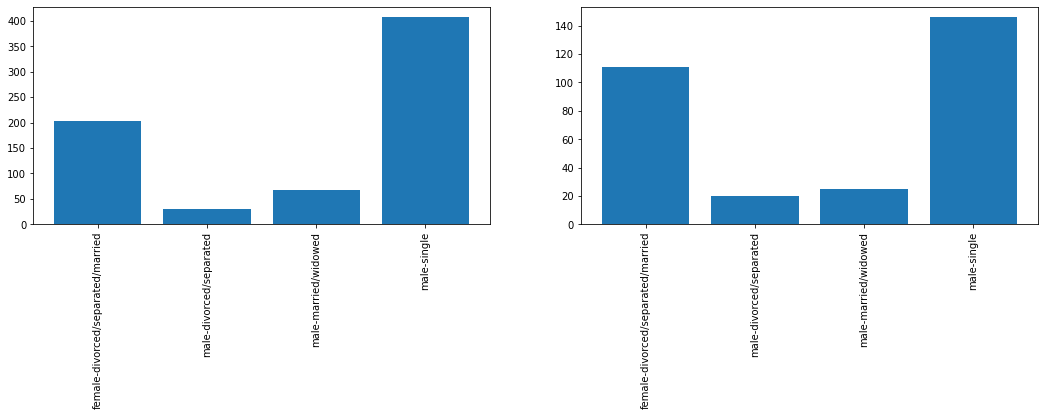

For column other_signators:


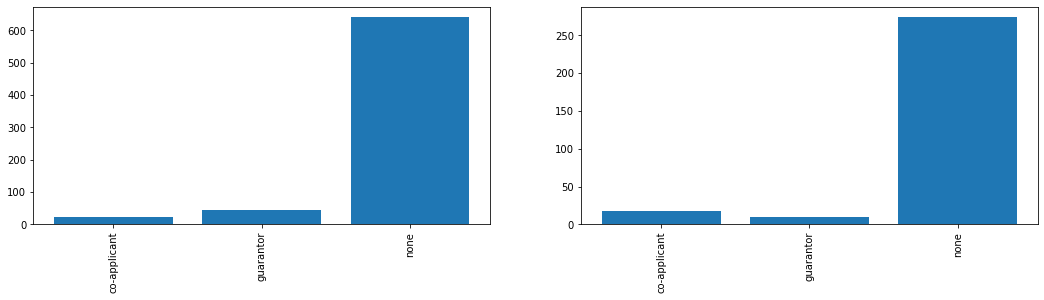

For column property:


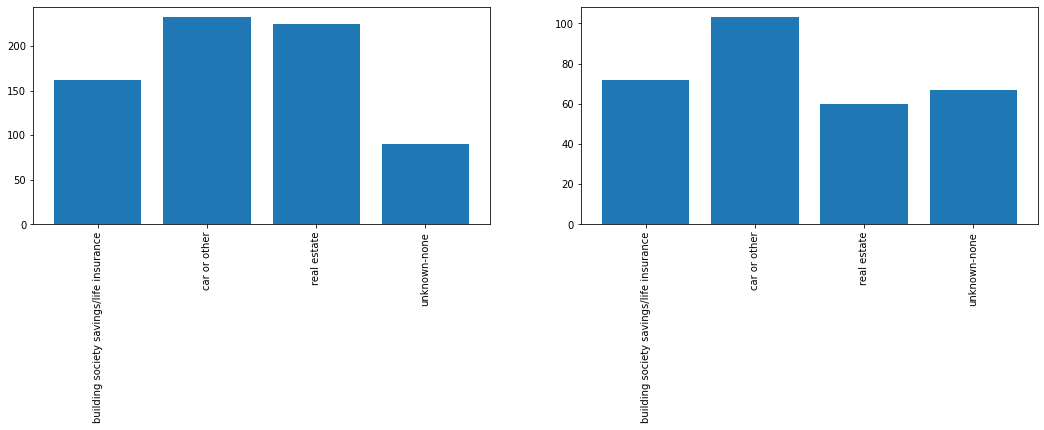

For column other_credit_outstanding:


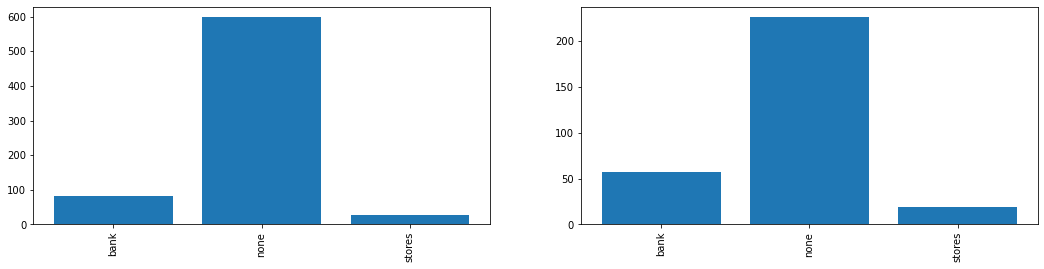

For column home_ownership:


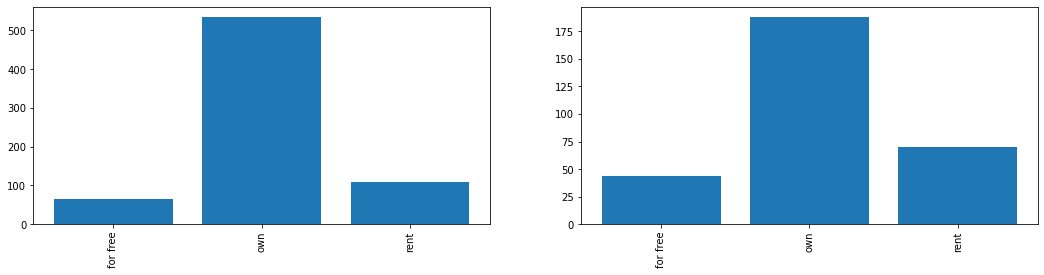

For column job_category:


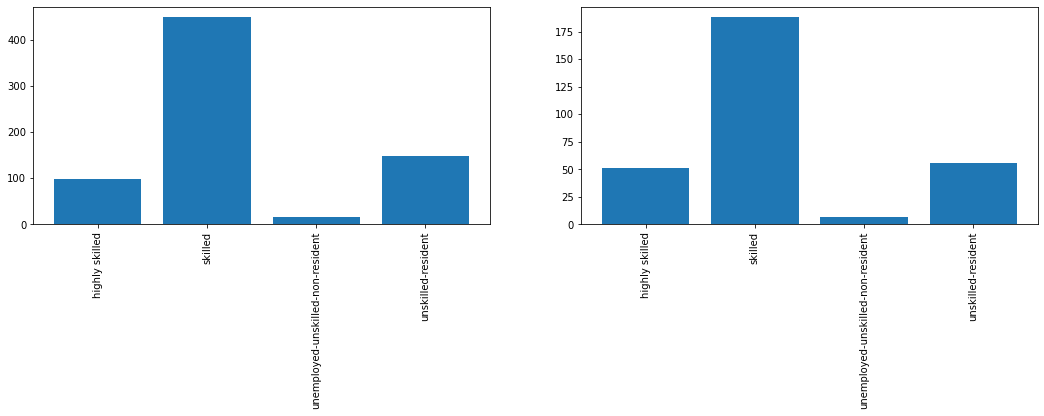

For column telephone:


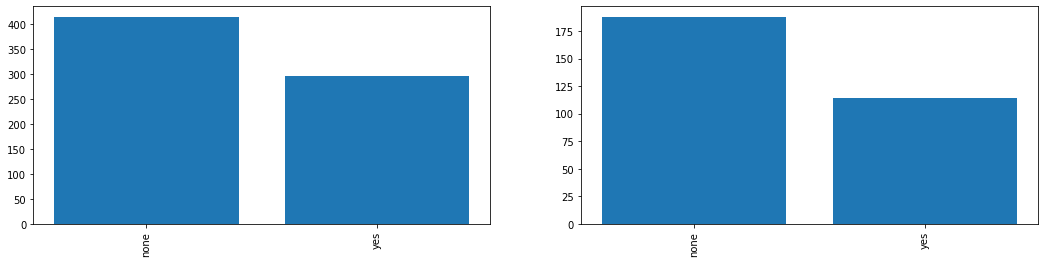

For column foreign_worker:


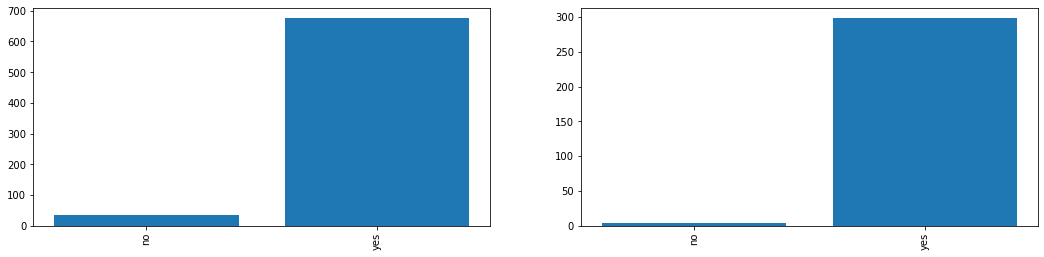

In [39]:
for column in cat_cols:
    print(f'For column {column}:')
    
    sub_data = data[['dummy', 'bad_credit', column]].groupby([
        'bad_credit', column], as_index = False).count()
    
    negatives = sub_data[sub_data['bad_credit'] == 0][[column, 'dummy']]
    positives = sub_data[sub_data['bad_credit'] == 1][[column, 'dummy']]
    
    # creating a figure object to display plots
    fig = plt.figure(figsize=(18, 4))
    
    # creating the sub plot to plot the negatives
    plt.subplot(1, 2, 1)  # one row, two columns, 
    plt.bar(negatives[column], negatives.dummy)
    plt.xticks(rotation=90)
    
    # creating the sub plot to plot the positives
    plt.subplot(1, 2, 2)  # one row, two columns, 
    plt.bar(positives[column], positives.dummy)
    plt.xticks(rotation=90)
    plt.show()

In [31]:
data

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit,dummy
0,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,22,none,own,1,skilled,1,none,yes,1,1.0
1,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,...,49,none,own,1,unskilled-resident,2,none,yes,0,1.0
2,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,...,45,none,for free,1,skilled,2,none,yes,0,1.0
3,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,none,...,53,none,for free,2,skilled,2,none,yes,1,1.0
4,none,36,current loans paid,education,9055,unknown/none,1 - 4 years,2,male-single,none,...,35,none,for free,1,unskilled-resident,2,yes,yes,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,none,12,current loans paid,furniture/equipment,1736,< 100 DM,4 - 7 years,3,female-divorced/separated/married,none,...,31,none,own,1,unskilled-resident,1,none,yes,0,1.0
1007,< 0 DM,30,current loans paid,car (used),3857,< 100 DM,1 - 4 years,4,male-divorced/separated,none,...,40,none,own,1,highly skilled,1,yes,yes,0,1.0
1008,none,12,current loans paid,radio/television,804,< 100 DM,>= 7 years,4,male-single,none,...,38,none,own,1,skilled,1,none,yes,0,1.0
1009,< 0 DM,45,current loans paid,radio/television,1845,< 100 DM,1 - 4 years,4,male-single,none,...,23,none,for free,1,skilled,1,yes,yes,1,1.0
